# Data Visualization in python

[article](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed)

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('datasets/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
wine_reviews = pd.read_csv('datasets/winemag-data-130k-v2.csv', index_col=0)

In [4]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Matplotlib

### Scatter plot

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sepal_width')

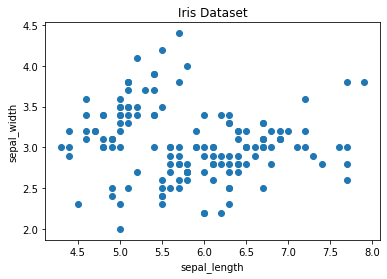

In [33]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width 
ax.scatter(iris['sepal_length'], iris['sepal_width'])

ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

Text(0, 0.5, 'sepal_width')

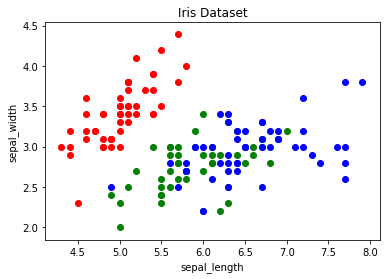

In [8]:
# create a colors dict
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

fig, ax = plt.subplots()

# plot each points
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i], color=colors[iris['class'][i]])

ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

### Line chart

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


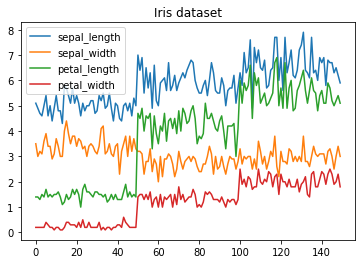

In [20]:
# get columns to plot
columns = iris.columns.drop(['class'])

# create x data
x_data = range(0, iris.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
    
ax.set_title('Iris dataset')
ax.legend()

### Histogram

Text(0, 0.5, 'Frequency')

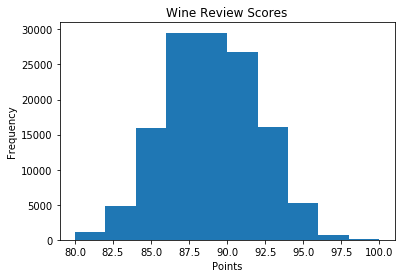

In [22]:
fig, ax = plt.subplots()

# plot histogram 
ax.hist(wine_reviews['points'])

ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

### Bar chart

Text(0, 0.5, 'Frequency')

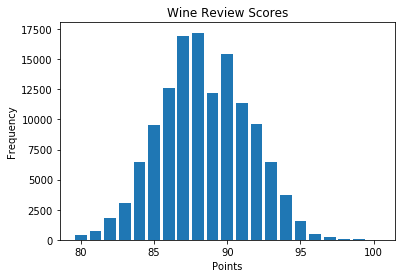

In [23]:
fig, ax = plt.subplots()

# count the occurrence of each class
data = wine_reviews['points'].value_counts()

# get x and y data
points = data.index
frequency = data.values

# create bar chart
ax.bar(points, frequency)

ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

## Pandas

### Scatter plot

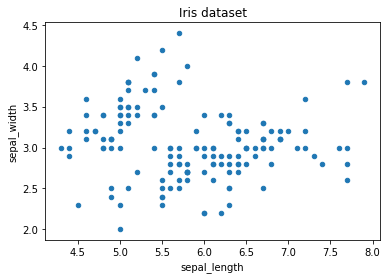

In [25]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris dataset')

### Line chart

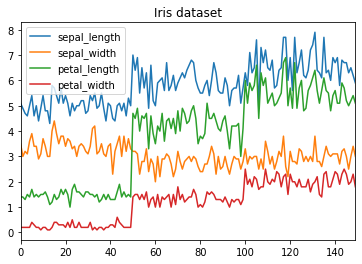

In [27]:
iris.drop(['class'], axis=1).plot.line(title='Iris dataset')

### Histogram

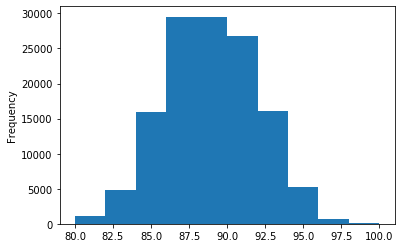

In [28]:
wine_reviews['points'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120118630>,
      dtype=object)

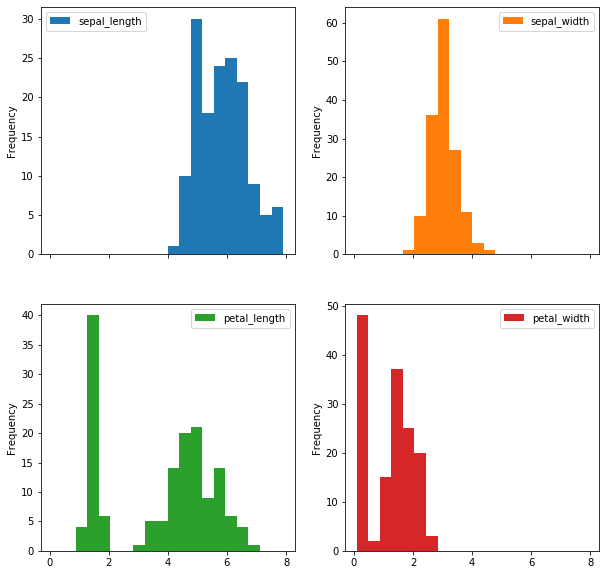

In [29]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20)

### Bar chart

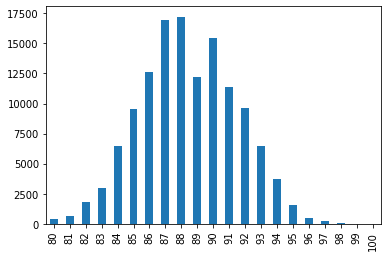

In [30]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

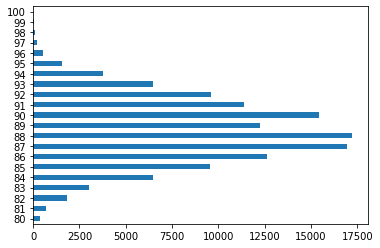

In [31]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

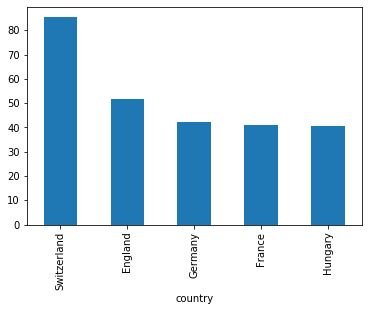

In [32]:
wine_reviews.groupby('country').price.mean().sort_values(ascending=False)[:5].plot.bar()

## Seaborn

In [34]:
import seaborn as sns

### Scatter plot

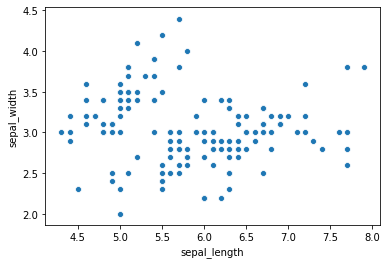

In [37]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

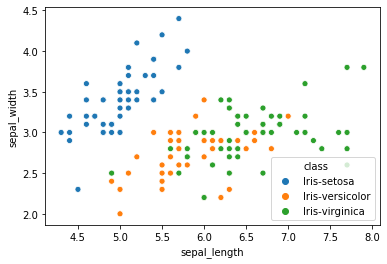

In [36]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='class')

### Line chart

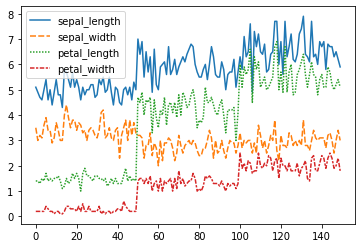

In [41]:
sns.lineplot(data=iris.drop(['class'], axis=1))

### Histogram

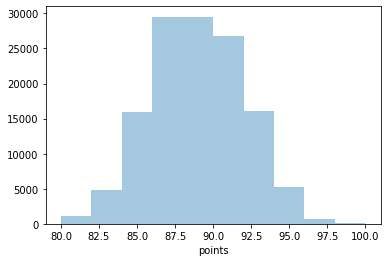

In [46]:
# doesn't plot the gaussian kernel density estimate (kde)
sns.distplot(wine_reviews['points'], bins=10, kde=False)

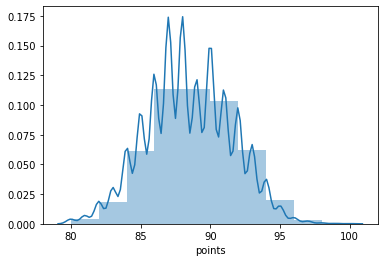

In [47]:
# plot the gaussian kernel density estimate (kde)
sns.distplot(wine_reviews['points'], bins=10, kde=True)

### Bar chart

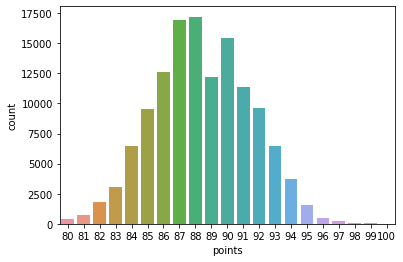

In [48]:
sns.countplot(wine_reviews['points'])

## Other charts

### Box plots

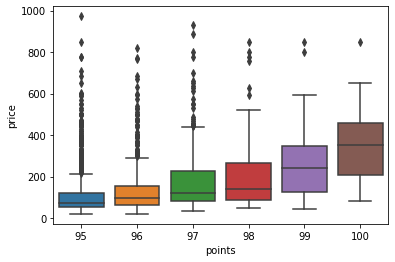

In [51]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

### Heatmap (matplotlib)

[None, None, None, None, None, None, None, None]

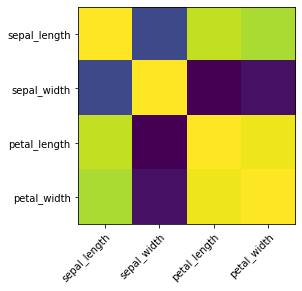

In [55]:
import numpy as np

# get correlation matrix
corr = iris.corr()

fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

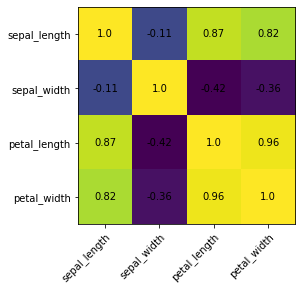

In [56]:
import numpy as np

# get correlation matrix
corr = iris.corr()

fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
         rotation_mode='anchor')

# loop over data dimensions and create text annotations
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

### Heatmap (seaborn)

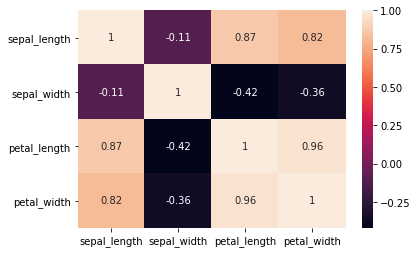

In [57]:
sns.heatmap(iris.corr(), annot=True)

### Faceting

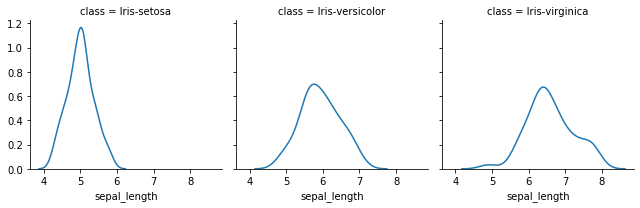

In [58]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

### Pairplot (seaborn)

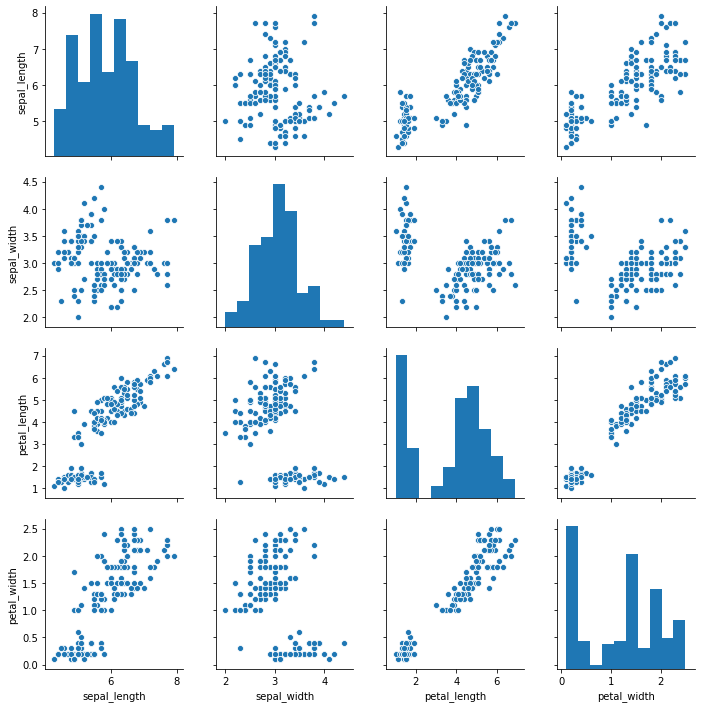

In [59]:
sns.pairplot(iris)

### Pairplot (pandas)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27884e10>,
      dtype=object)

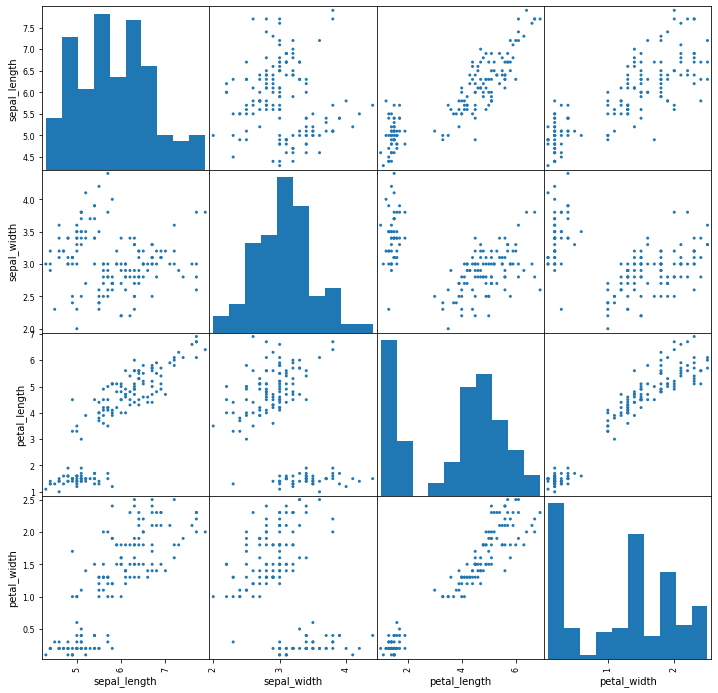

In [61]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)